![image](https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab06/Images/logo-mecanica.png?raw=1)

# Laboratorio 6: Valores Propios y Vectores Propios

Este notebook repasa los conceptos y métodos numéricos para el cálculo de valores propios y vectores propios de matrices. Se incluye una revisión de la teoría fundamental, métodos de localización y algoritmos iterativos, seguida de un ejercicio práctico.

## 1. Repaso de la teoría

Una matriz representa una **transformación lineal** en un espacio vectorial. La operación $A\vec{x} = \vec{b}$ describe cómo la matriz $A$ transforma el vector $\vec{x}$ en el vector $\vec{b}$. Estas transformaciones lineales pueden incluir **expansión o contracción**, **rotación**, **reflexiones**, **permutación de componentes**, entre otras. Toda transformación lineal puede verse como una mezcla de estas transformaciones elementales.

La idea clave es analizar una transformación lineal descomponiéndola en sus componentes elementales para entender su naturaleza. Esto es útil en diversas aplicaciones de ingeniería mecánica, como el análisis de la **estabilidad de una estructura**, las **vibraciones de un sistema**, los **esfuerzos principales**, y la **estabilidad y convergencia de algoritmos iterativos**.

Para una matriz cuadrada $A$ de tamaño $n \times n$ que representa una transformación lineal en el espacio vectorial $\mathbb{R}^n$, un vector $\vec{x}$ no nulo en $\mathbb{R}^n$ define una dirección. Si la transformación $A$ cambia la magnitud del vector $\vec{x}$, pero **no cambia su dirección**, es decir, si $A\vec{x} = \lambda\vec{x}$ para algún escalar $\lambda$, entonces $\lambda$ es un **autovalor** (eigenvalor o valor propio) y $\vec{x}$ es un **autovector** (eigenvector o vector propio) de la matriz $A$. $\lambda$ representa el factor de escala de la transformación lineal en la dirección del autovector $\vec{x}$.

La ecuación $A\vec{x} = \lambda\vec{x}$ puede reescribirse como $(A - \lambda I)\vec{x} = 0$. Esta ecuación tiene una solución no trivial $\vec{x} \neq 0$ si y solo si el determinante de la matriz $(A - \lambda I)$ es cero:

$$\det(A - \lambda I) = 0$$

Esta ecuación se conoce como la **ecuación característica** y, para una matriz $n \times n$, es un polinomio de grado $n$ en $\lambda$. Este polinomio característico tiene exactamente $n$ raíces, que pueden ser reales o complejas. Cada una de estas raíces corresponde a un autovalor de la matriz $A$. Por lo tanto, una matriz $n \times n$ tiene **n autovalores**. Los autovalores complejos siempre aparecen en **pares conjugados** y se suelen ordenar los autovalores de mayor a menor magnitud.

$$ \|\lambda_1\| < \|\lambda_2\| < \dots < \|\lambda_n\| $$

Calcular los autovalores implica encontrar las raíces del polinomio característico. Debido al Teorema de Abel-Ruffini, no existe un algoritmo general para encontrar las raíces de un polinomio de grado $n \geq 5$. Por ello, calcular los autovalores de matrices de orden $n \geq 5$ requiere **algoritmos iterativos**.

La **multiplicidad algebraica** de un autovalor $\lambda$ es el número de veces que aparece como raíz del polinomio característico. La **multiplicidad geométrica** es el número de autovectores linealmente independientes asociados a ese autovalor. Si estas multiplicidades son iguales, el autovalor se dice que es **diagonalizable**. Una matriz $n \times n$ es diagonalizable si tiene $n$ autovectores linealmente independientes, lo que permite escribirla en la forma $A = PDP^{-1}$.

Es importante notar que los autovectores no son únicos; si $\vec{u}$ es un autovector para $\lambda$, cualquier múltiplo escalar no nulo $k\vec{u}$ también lo es. Por convención, se normaliza el autovector para que su norma sea igual a 1.


## 2. Métodos de localización de autovalores

En muchas situaciones, no es necesario calcular los autovalores con precisión, sino que basta con **acotar su posición** en alguna región del plano complejo. Por ejemplo, puede ser suficiente saber si su norma es menor o igual a un radio $r$ ($\|\lambda\| \leq r$), o si son positivos ($\lambda > 0$) o negativos ($\lambda < 0$).

Existen métodos que permiten localizar los autovalores sin calcularlos directamente. A partir de la definición de las normas de matrices, se pueden establecer acotaciones para los autovalores:

$$\|A\|_2 \geq \max_i |\lambda_i|$$

Un método más específico es el **Teorema de Gershgorin**, que establece que los autovalores de una matriz $A$ se encuentran en la **unión de los discos de Gershgorin**. Los discos de Gershgorin $D_i$ se definen para cada fila $i$ de la matriz $A$ como:

$$D_i = \{z \in \mathbb{C} : |z - a_{ii}| \leq \sum_{j, i \neq j} |a_{ij}|\}$$

Estos discos tienen su centro en el elemento diagonal $a_{ii}$ y su radio es igual a la suma de los valores absolutos de todos los elementos no diagonales en la fila $i$.


## 3. Métodos para calcular autovalores dominantes

Para matrices de gran tamaño o cuando solo se necesita el autovalor de mayor o menor magnitud (autovalores dominantes), se utilizan algoritmos iterativos específicos. Algunos de estos métodos para autovalores dominantes incluyen:

- **Iteración de potencia**
- **Iteración de potencia inversa**
- **Cociente de Rayleigh** (usado a menudo con iteración de potencia)

Otros métodos, como la iteración simultánea de potencia, el método QR y el método de Arnoldi, se utilizan para calcular el espectro completo (todos los autovalores y autovectores).

### 3.1 Iteración de Potencia

Es un algoritmo iterativo utilizado para encontrar el **autovalor dominante** (el de mayor magnitud) y su autovector asociado. El método consiste en transformar reiterativamente un vector inicial no nulo $\vec{x}_0$ con la matriz $A$: $\vec{x}_{k+1} = A\vec{x}_k$. Esto provoca una "polarización" del vector hacia la dirección del autovector dominante.

El algoritmo general (sin normalización) es el siguiente:
```
Algoritmo
1: Input: Matriz A, vector inicial x0, número de iteraciones N
2: x ← x0
3: for k = 1 to N do
4:    x ← Ax
5: end for
6: λ ≈ ( ∥x(N)∥ / ∥x(N−1)∥ )
```

Este método presenta problemas de convergencia si el autovalor dominante es complejo. Además, el vector inicial $\vec{x}_0$ debe tener una componente no nula en la dirección del autovector asociado al autovalor dominante. Si la matriz A y el vector inicial son reales, no converge a un autovector complejo. Un problema común es el crecimiento exponencial del vector iterado si el autovalor dominante es grande, lo que puede causar overflow. Para mitigar esto y mantener los vectores dentro de un rango manejable, se utiliza una versión normalizada:

```
Algoritmo
1: Input: Matriz A, vector inicial x0, número de iteraciones N
2: x ← x0
3: for k = 1 to N do
4:    y ← Ax
5:    x ← y / ∥y∥
6: end for
7: λ ≈ (∥y∥)
```

### 3.2 Iteración de Potencia Inversa

Este algoritmo iterativo se utiliza para encontrar el **menor autovalor** (el de menor magnitud) y su autovector asociado de una matriz $A$. Se basa en transformar reiterativamente un vector inicial no nulo con la **inversa** de la matriz $A$: $\vec{x}_{k+1} = A^{-1}\vec{x}_k$. Esto provoca una "polarización inversa" del vector. Dado que los autovalores de $A^{-1}$ son los recíprocos de los autovalores de $A$, el autovalor dominante de $A^{-1}$ corresponde al autovalor de menor magnitud de $A$. Aplicar $A^{-1}$ a $\vec{x}_k$ es equivalente a resolver el sistema lineal $A\vec{y}_k = \vec{x}_k$ para $\vec{y}_k$, donde $\vec{x}_{k+1} = \vec{y}_k$ (antes de normalizar).

El algoritmo general (normalizado) es el siguiente:
```
Algoritmo 3: Iteración de Potencia Inversa
1: Input: Matriz A, vector inicial x0, número de iteraciones N
2: x ← x0
3: for k = 1 to N do
4:    Solve Ay = x for y
5:    x ← y / ∥y∥
6: end for
7: λ ≈ (1 / ∥yk∥)
```

### 3.3 Cociente de Rayleigh

El cociente de Rayleigh es una **estimación del autovalor** de una matriz $A$ para un vector dado $\vec{x}$. Se define como:

$$R(\vec{x}) = \frac{\vec{x}^T A \vec{x}}{\vec{x}^T \vec{x}}$$

Este valor escalar se aproxima al autovalor asociado cuando $\vec{x}$ es una aproximación del autovector correspondiente. El cociente de Rayleigh se puede utilizar en conjunto con métodos como la iteración de potencia para mejorar la convergencia. En la iteración de potencia con desplazamiento de Rayleigh, se utiliza la estimación $\sigma_{k+1} = R(\vec{x}_k)$ para definir un desplazamiento en la matriz en cada iteración.

```
Algoritmo 4: Iteración de Potencia con desplazamiento de Rayleigh
1: Input: Matriz A, vector inicial x0, número de iteraciones N
2: x ← x0
3: for k = 1 to N do
4:    σ ← xT A x/ xT x
5:    Solve (A − σI)y = x for y
6:    x ← y / ∥yk∥
7: end for
8: λ ≈ σ
```


## 4. Ejercicio Propuesto

En los métodos numéricos empleados para resolver ecuaciones diferenciales, se suelen emplear matrices como discretizacion de operadores diferenciales. Considere la siguiente matriz D, utilizada en un método espectral, para aproximar numéricamente una segunda derivada:
$$D_{i,j} = F_o \, G_{i,j} = F_o \frac{\partial^{2} L_{i}}{\partial x_{j}^{2}}$$
donde $F_{o}$ es un escalar positivo y la matriz $G_{i,j}$ es la matriz compuesta por las segundas derivadas de los polinomios de interpolación de Lagrange evaluados sobre los nodos:

![image](https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab06/Images/GLL-basis.svg?raw=1)

La matriz $G$ se representa en la siguiente figura:

![image](https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab06/Images/derivative-matrix.svg?raw=1)

Estamos interesados en estudiar los valores propios de esta matriz de discretizacion para garantizar la convergencia del respectivo método iterativo. Para esto necesitamos estudiar la magnitud del autovalor dominante $\lambda_1$ en función del parámetro escalar $F_{o}$.

1.  **Teoría y Localización:**
    *   Utilizando las normas de la matriz $D$, grafique la región sobre el plano complejo que acota la posición de los autovalores.
    *   Sin calcular explícitamente los autovalores, aplique el Teorema de Gershgorin para determinar las regiones del plano complejo donde deben encontrarse los autovalores de la matriz y grafiquelos sobre el plano complejo.

3.  **Métodos Iterativos:**
    *   Utilice el método de **Iteración de Potencia** (sin normalización) con un vector inicial aleatorio $\vec{x}_0$ para estimar el valor propio dominante $\lambda_1$ y su correspondiente vector propio $\vec{v}_i$. Grafique estos valores en función del número de iteraciones
    *   ¿Qué observa en la dirección del vector iterado? ¿Hacia qué autovector cree que está convergiendo (si converge)?
    *   Realice el mismo estudio utilizando el algoritmo del cociente de Rayleigh, cómo se compara la convergencia de ambos métodos?
    *   Determine cuál es el valor máximo que puede tomar el parámetro escalar $F_{o}$ si se busca que el valor propio dominante $\lambda_1$ sea menor que $0.5$.

In [2]:
import numpy
G = numpy.array([[0.6874057848834951,-0.609622462799236,-0.20650465595854142,0.2487119654819635,-0.22520328788284574,0.19712743226235152,-0.17287416095579783,0.15301974210671054,-0.13684939641944258,0.12356708491705955,-0.11251185169330866,0.10316414953823977,-0.09512010735956988,0.08805202818475176,-0.08167356329219848,0.07571329017028881,-0.06986928433583979,0.06373093226731975,-0.056592344236477396,0.046766183493223805,-0.020437478372145327],
[-0.609622462799236,1.4560942381414308,-0.7562826528838531,-0.27445562904359205,0.3712077853319385,-0.36053521373664704,0.33189010524697105,-0.30251333055137225,0.2761582278598146,-0.2533248977547501,0.23366996141099383,-0.2166615206489108,0.20177429034039399,-0.1885160212801253,0.176407924519559,-0.1649558682984923,0.1535651983124133,-0.14137400925491148,0.1268321769923618,-0.1061243858290467,0.046766083925059786],
[-0.20650465595854142,-0.7562826528838531,1.9992866562083875,-1.0590491708102012,-0.09057200967208089,0.2534952758733644,-0.2829657139294217,0.28028793755530823,-0.26855435604235806,0.2546633599881056,-0.2409127588537608,0.22803557868440244,-0.2161778124330811,0.20522670809409763,-0.19492420839548202,0.1848994569082715,-0.17460330569203236,0.1631298819427501,-0.14871841722185947,0.12683262775223872,-0.056592421114254526],
[0.2487119654819635,-0.27445562904359205,-1.0590491708102012,2.204604719445982,-1.2009593100184799,0.010229607341278573,0.18041826660226118,-0.2293410940402359,0.24078570152180293,-0.23961261783085835,0.2338147829939103,-0.22639051844997496,0.21854002899238986,-0.21069821009539533,0.20291429095949054,-0.1949954038976871,0.1864846899093653,-0.17648888990829587,0.16313062673621395,-0.14137510125903796,0.06373126536910147],
[-0.22520328788284574,0.3712077853319385,-0.09057200967208089,-1.2009593100184799,2.310967298096975,-1.2812261615843517,0.07137512372035122,0.13354553419884016,-0.19335383707387305,0.21328667861970918,-0.21885995590538457,0.21851318778282805,-0.21555700298974412,0.21138170920505286,-0.20652149915094653,0.20104880867313568,-0.1946499553684758,0.18648391392068417,-0.17460344588243712,0.15356581671533143,-0.06986939073622757],
[0.19712743226235152,-0.36053521373664704,0.2534952758733644,0.010229607341278573,-1.2812261615843517,2.374223589684424,-1.3310312716345527,0.11056149519443306,0.10278999490141985,-0.16941783363420004,0.1949464464913255,-0.20517740152295105,0.20875839152778478,-0.2091200676521435,0.20770640716458272,-0.20504269035555764,0.20105126892032976,-0.19499687512217143,0.18490175294965985,-0.16495837515548406,0.075714228087106],
[-0.17287416095579783,0.33189010524697105,-0.2829657139294217,0.18041826660226118,0.07137512372035122,-1.3310312716345527,2.4143507247617344,-1.363139363453145,0.13606800119223414,0.08283234876775503,-0.1541538100812957,0.18370612060320593,-0.19742939568938586,0.2040423677529991,-0.20699788718903767,0.2077082883825699,-0.2065256434431197,0.2029170702148452,-0.1949276103566235,0.17641122952622654,-0.0816747900387742],
[0.15301974210671054,-0.30251333055137225,0.28028793755530823,-0.2293410940402359,0.13354553419884016,0.11056149519443306,-1.363139363453145,2.4403314960327975,-1.3838339905669732,0.15214170859260018,0.07076958327919412,-0.1456380772952363,0.17836474989502166,-0.19492641416905043,0.20404379661403219,-0.20912352680653185,0.2113873135606964,-0.21070213803946602,0.2052311461217721,-0.18852013799672854,0.08805356976733439],
[-0.13684939641944258,0.2761582278598146,-0.26855435604235806,0.24078570152180293,-0.19335383707387305,0.10278999490141985,0.13606800119223414,-1.3838339905669732,2.456639728978543,-1.3962217209888481,0.16105517254780807,0.06506410924025365,-0.14290171761322093,0.17836921275804893,-0.19743467245916843,0.20876546450371272,-0.2155657282702238,0.218546427646438,-0.21618432758845502,0.20177994889534412,-0.09512224302285842],
[0.12356708491705955,-0.2533248977547501,0.2546633599881056,-0.23961261783085835,0.21328667861970918,-0.16941783363420004,0.08283234876775503,0.15214170859260018,-1.3962217209888481,2.46565673085978,-1.4021176259713852,0.16393436409775572,0.06506131681681099,-0.1456412247680533,0.18370994258400922,-0.2051832817195616,0.2185205179036604,-0.2263951348049242,0.22804028627503198,-0.216665362961333,0.10316536101163641],
[-0.11251185169330866,0.23366996141099383,-0.2409127588537608,0.2338147829939103,-0.21885995590538457,0.1949464464913255,-0.1541538100812957,0.07076958327919412,0.16105517254780807,-1.4021176259713852,2.468615498043854,-1.402143495739917,0.16106611912407773,0.07077103979275434,-0.15415670654603716,0.19495248996910103,-0.2188675939735173,0.2338195532150723,-0.24091782543689155,0.2336742127274653,-0.1125132353940588],
[0.10316414953823977,-0.2166615206489108,0.22803557868440244,-0.22639051844997496,0.21851318778282805,-0.20517740152295105,0.18370612060320593,-0.1456380772952363,0.06506410924025365,0.16393436409775572,-1.402143495739917,2.4656970122128916,-1.3962320254990521,0.1521290112119103,0.08284206719100812,-0.16943015498487343,0.21329922608016602,-0.23962103978677002,0.25467148378129323,-0.2533314407493184,0.12356936425304932],
[-0.09512010735956988,0.20177429034039399,-0.2161778124330811,0.21854002899238986,-0.21555700298974412,0.20875839152778478,-0.19742939568938586,0.17836474989502166,-0.14290171761322093,0.06506131681681099,0.16106611912407773,-1.3962320254990521,2.4565977963642025,-1.3837820904100169,0.1360551648678538,0.1028045216532547,-0.1933663040602791,0.24079249944730546,-0.2685603823993002,0.27616224482944773,-0.13685028540489516],
[0.08805202818475176,-0.1885160212801253,0.20522670809409763,-0.21069821009539533,0.21138170920505286,-0.2091200676521435,0.2040423677529991,-0.19492641416905043,0.17836921275804893,-0.1456412247680533,0.07077103979275434,0.1521290112119103,-1.3837820904100169,2.440318608410641,-1.3631619678247233,0.11054868208379286,0.1335560038738886,-0.22934580634052543,0.2802926707969143,-0.30251646868984067,0.15302022906502372],
[-0.08167356329219848,0.176407924519559,-0.19492420839548202,0.20291429095949054,-0.20652149915094653,0.20770640716458272,-0.20699788718903767,0.20404379661403219,-0.19743467245916843,0.18370994258400922,-0.15415670654603716,0.08284206719100812,0.1360551648678538,-1.3631619678247233,2.414334661873916,-1.3309760166568885,0.07136155893769983,0.18042195182932527,-0.28296913283871344,0.33189154655816544,-0.17287365874644503],
[0.07571329017028881,-0.1649558682984923,0.1848994569082715,-0.1949954038976871,0.20104880867313568,-0.20504269035555764,0.2077082883825699,-0.20912352680653185,0.20876546450371272,-0.2051832817195616,0.19495248996910103,-0.16943015498487343,0.1028045216532547,0.11054868208379286,-1.3309760166568885,2.3741869734111556,-1.2812431793475598,0.010236486868989992,0.25349330566525496,-0.3605330293264027,0.19712538310402639],
[-0.06986928433583979,0.1535651983124133,-0.17460330569203236,0.1864846899093653,-0.1946499553684758,0.20105126892032976,-0.2065256434431197,0.2113873135606964,-0.2155657282702238,0.2185205179036604,-0.2188675939735173,0.21329922608016602,-0.1933663040602791,0.1335560038738886,0.07136155893769983,-1.2812431793475598,2.3109987694454808,-1.2009660383707195,-0.09057336044122764,0.3712082150468957,-0.22520236868760124],
[0.06373093226731975,-0.14137400925491148,0.1631298819427501,-0.17648888990829587,0.18648391392068417,-0.19499687512217143,0.2029170702148452,-0.21070213803946602,0.218546427646438,-0.2263951348049242,0.2338195532150723,-0.23962103978677002,0.24079249944730546,-0.22934580634052543,0.18042195182932527,0.010236486868989992,-1.2009660383707195,2.204593344255638,-1.0590363653778865,-0.2744559170234697,0.24871015242077177],
[-0.056592344236477396,0.1268321769923618,-0.14871841722185947,0.16313062673621395,-0.17460344588243712,0.18490175294965985,-0.1949276103566235,0.2052311461217721,-0.21618432758845502,0.22804028627503198,-0.24091782543689155,0.25467148378129323,-0.2685603823993002,0.2802926707969143,-0.28296913283871344,0.25349330566525496,-0.09057336044122764,-1.0590363653778865,1.9992876969191444,-0.7562975564211029,-0.20650037803667137],
[0.046766183493223805,-0.1061243858290467,0.12683262775223872,-0.14137510125903796,0.15356581671533143,-0.16495837515548406,0.17641122952622654,-0.18852013799672854,0.20177994889534412,-0.216665362961333,0.2336742127274653,-0.2533314407493184,0.27616224482944773,-0.30251646868984067,0.33189154655816544,-0.3605330293264027,0.3712082150468957,-0.2744559170234697,-0.7562975564211029,1.4561113230918614,-0.6096255732244362],
[-0.020437478372145327,0.046766083925059786,-0.056592421114254526,0.06373126536910147,-0.06986939073622757,0.075714228087106,-0.0816747900387742,0.08805356976733439,-0.09512224302285842,0.10316536101163641,-0.1125132353940588,0.12356936425304932,-0.13685028540489516,0.15302022906502372,-0.17287365874644503,0.19712538310402639,-0.22520236868760124,0.24871015242077177,-0.20650037803667137,-0.6096255732244362,0.687406185775259]])

#Manuel Casanova 202141080-5
#1. Teoría y localización


Norma 1: 8.514309719191113
Norma infinito: 8.514309719191113
Norma Frobenius: 13.09704675438145
Norma 2: 5.984241960551073


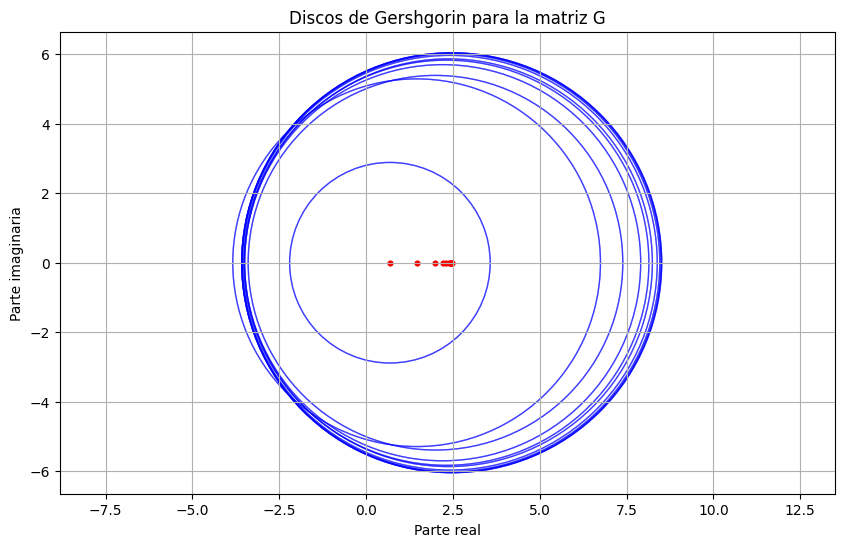

In [4]:
import numpy as np
import matplotlib.pyplot as plt

norma_1 = np.max(np.sum(np.abs(G), axis=0))
norma_inf = np.max(np.sum(np.abs(G), axis=1))
norma_frobenius = np.sqrt(np.sum(G**2))
norma_2 = np.sqrt(np.max(np.linalg.eigvals(G.T @ G)))

print(f"Norma 1: {norma_1}")
print(f"Norma infinito: {norma_inf}")
print(f"Norma Frobenius: {norma_frobenius}")
print(f"Norma 2: {norma_2}")


cota_max_valor_propio = norma_2

# Calculo discos de Gershgorin
diagonales = np.diag(G)
radios = np.sum(np.abs(G), axis=1) - np.abs(diagonales)


plt.figure(figsize=(10, 6))
for i in range(len(G)):
    circulo = plt.Circle((diagonales[i], 0), radios[i], fill=False, color='blue', alpha=0.5)
    plt.gca().add_patch(circulo)
    plt.scatter(diagonales[i], 0, color='red', s=10)

plt.title('Discos de Gershgorin para la matriz G')
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.grid(True)
plt.axis('equal')
plt.show()

#Metodos iterativos


#Iteración de potencia


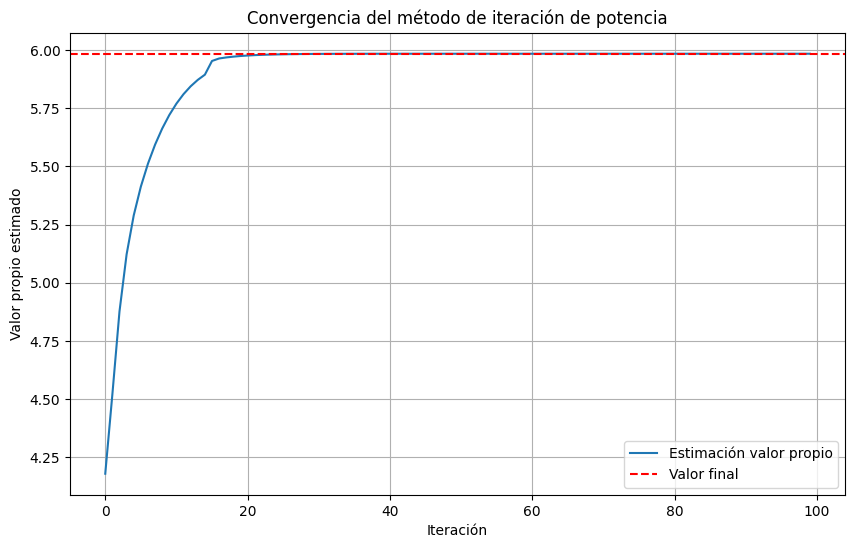

Valor propio dominante estimado: 5.984239735617009
Vector propio asociado (normalizado):
[-0.02349591  0.09361335 -0.17195184  0.20828064 -0.18714422  0.10931446
  0.01137416 -0.15174926  0.28432075 -0.38298456  0.42831385 -0.41147975
  0.33608755 -0.21744972  0.07947     0.05016162 -0.14561434  0.1884102
 -0.17189842  0.10514976 -0.03072835]


In [19]:
def iteracion_potencia(A, num_iteraciones=100):
    n = A.shape[0]
    x = np.random.rand(n)

    valores_propios = []

    for _ in range(num_iteraciones):
        x = A @ x
        # Estimación del valor propio usando la norma infinito
        lambda_estimado = np.linalg.norm(A @ x, np.inf) / np.linalg.norm(x, np.inf)
        valores_propios.append(lambda_estimado)
        x = x / np.linalg.norm(x)

    return x, valores_propios

# Probamos con F₀ = 1 (D = G)
vector_dominante, historia_valores = iteracion_potencia(G, 100)

# Graficar convergencia
plt.figure(figsize=(10, 6))
plt.plot(historia_valores, label='Estimación valor propio')
plt.axhline(y=historia_valores[-1], color='r', linestyle='--', label='Valor final')
plt.title('Convergencia del método de iteración de potencia')
plt.xlabel('Iteración')
plt.ylabel('Valor propio estimado')
plt.legend()
plt.grid(True)
plt.show()

print(f"Valor propio dominante estimado: {historia_valores[-1]}")
print(f"Vector propio asociado (normalizado):\n{vector_dominante}")

El método converge al valor propio dominante después de varias iteraciones.

El vector propio resultante muestra la dirección dominante de la transformación

#Cociente de Rayleigh



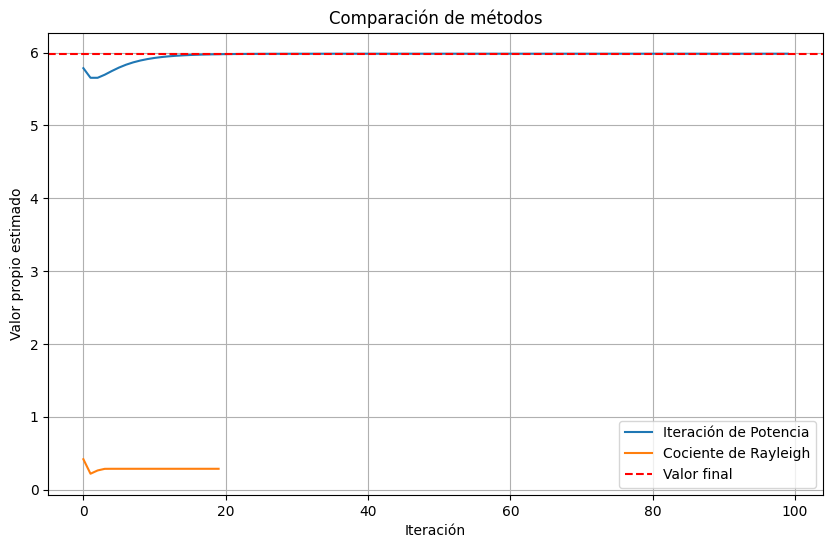

In [22]:
def iteracion_cociente_rayleigh(A, num_iteraciones=100):
    n = A.shape[0]
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)

    valores_propios = []

    for _ in range(num_iteraciones):
        # Calcular cociente de Rayleigh
        lambda_estimado = (x.T @ A @ x) / (x.T @ x)
        valores_propios.append(lambda_estimado)

        # Resolver (A - lambda_estimado I)y = x
        y = np.linalg.solve(A - lambda_estimado * np.eye(n), x)
        x = y / np.linalg.norm(y)

    return x, valores_propios

vector_rayleigh, historia_rayleigh = iteracion_cociente_rayleigh(G, 20)

# Graficar comparación
plt.figure(figsize=(10, 6))
plt.plot(historia_valores, label='Iteración de Potencia')
plt.plot(historia_rayleigh, label='Cociente de Rayleigh')
plt.axhline(y=historia_valores[-1], color='r', linestyle='--', label='Valor final')
plt.title('Comparación de métodos')
plt.xlabel('Iteración')
plt.ylabel('Valor propio estimado')
plt.legend()
plt.grid(True)
plt.show()

Converge mucho más rápido que la iteración de potencia simple.

Proporciona una estimación más precisa con menos iteraciones

#Determinación del valor máximo de F₀


In [23]:
valor_propio_dominante_G = historia_valores[-1]  # Valor propio dominante de G
F0_maximo = 0.5 / valor_propio_dominante_G

print(f"El valor máximo de F₀ para que λ₁ < 0.5 es: {F0_maximo}")

El valor máximo de F₀ para que λ₁ < 0.5 es: 0.08355278672170592
